In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [10]:
#Importando os dados
df = pd.read_csv('datasets/bank_default_prediction/train.csv')
pd.set_option("display.max_columns", None)




# Análise Exploratória dos Dados
Será feita uma análise, limpeza e preparação dos dados

In [12]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [13]:
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,105123.15580,Verified,n,Debt consolidation,16.052112,0,0,30,0,8762,81.692328,16,f,1324.255922,0.000671,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [14]:
print("Quantidade de dados: ", df.shape[0])
print("Quantidade de features: ", df.shape[1])

Quantidade de dados:  67463
Quantidade de features:  35


In [15]:
def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append(round(df[feature].isnull().sum() / df.shape[0],4))

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var

In [16]:
#Armazenando as features
features = df.columns.to_list()

#Armazenando as informações das variáveis
df_var = Map_Var_DF(features = features, df = df)

#Imprimindo o dataframe
df_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,ID,int64,0,0,67463,1297933,72245779,0.0
1,Loan Amount,int64,0,0,27525,1014,35000,0.0
2,Funded Amount,int64,0,0,24548,1014,34999,0.0
3,Funded Amount Investor,float64,0,0,67441,1114.590204,34999.74643,0.0
4,Term,int64,0,0,3,36,59,0.0
5,Batch Enrolled,object,1,0,41,N/A,N/A,0.0
6,Interest Rate,float64,0,0,67448,5.320006,27.182348,0.0
7,Grade,object,1,0,7,N/A,N/A,0.0
8,Sub Grade,object,1,0,35,N/A,N/A,0.0
9,Employment Duration,object,1,0,3,N/A,N/A,0.0


1 - Payment Plan tem um unico valor, portanto sera excluida.

2 - Accounts Delinquent tem somente 28 entradas diferentes de 0, portanto sera excluida. 

3 - A coluna ID sera excluida por nao trazer valor preditivo

4 - Não há dados ausentes





In [17]:
#Removendo as colunas 'Payment Plan' e 'Accounts Delinquent'
df.drop(['Payment Plan', 'Accounts Delinquent', 'ID'], axis = 1, inplace = True)


In [18]:
#Armazenando as features do dataframe
features_clean = df.columns.to_list()

#Replicando a função
var_df_clean = Map_Var_DF(features_clean,df)

#Armazenando as features numéricas
num_feature = var_df_clean['feature'].loc[ (var_df_clean['Tipo'] == 'float64') | (var_df_clean['Tipo'] == 'int64') ].to_list()


# Tratamento de outliers

Plotar um gráfico de boxplot para avaliar a presença de outliers.


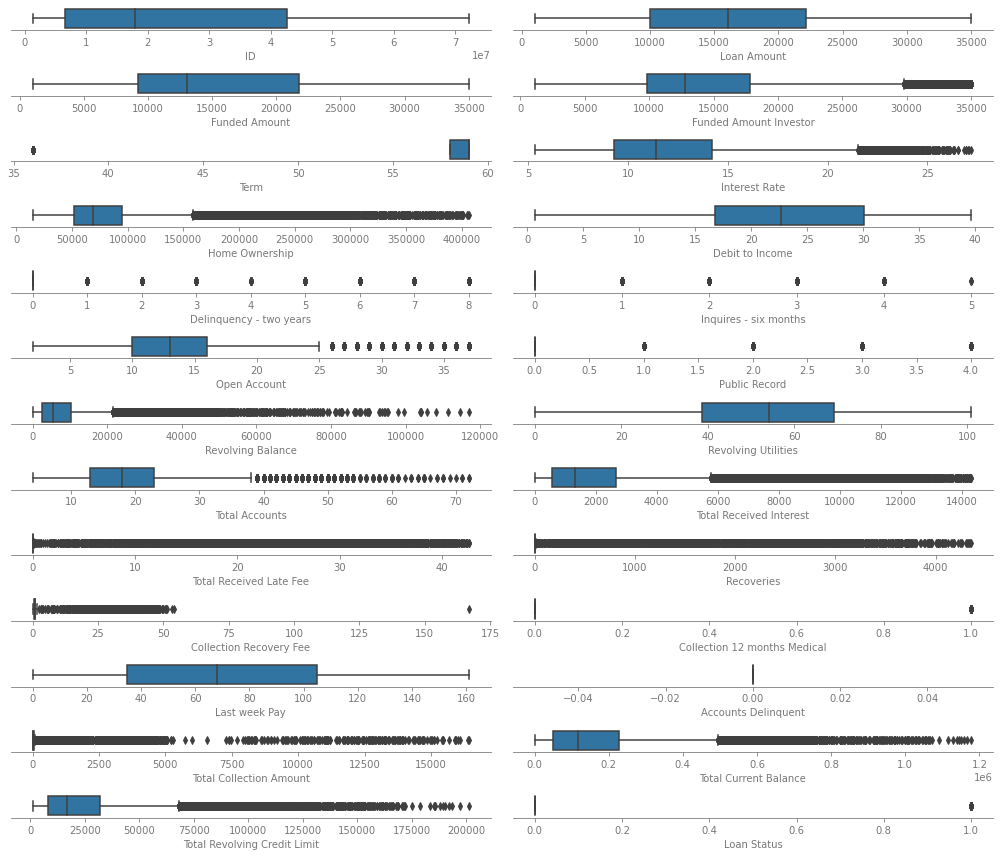

In [89]:
#Contador
cont_x = 0
cont_y = 0

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False,
             'axes.spines.left': False, 
             'ytick.left': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #Instanciando a figure e axes
  fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (14,12) )

  #Rodando loop entre as features numéricas
  for feature in num_feature:

    #Criando o Box Plot para as features
    sns.boxplot(x = feature, data = df, ax = ax[cont_x,cont_y])

    #Atualizando os valores dos contadores para o axes
    if cont_y == 1:
      cont_x = cont_x + 1
      cont_y = 0

    else :
      cont_y = cont_y + 1

  #Imprimindo os gráficos
  fig.tight_layout()

A partir dos boxplot podemos ver que existem uma quantidade grande de outliers. Por ora, vamos mantê-los e avaliar a eficiência dos modelos. Se necessário, retiramos os outliers de algumas variáveis.

C:\Users\luish\AppData\Local\Temp/ipykernel_11160/2270937749.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots( figsize = (14,4) )


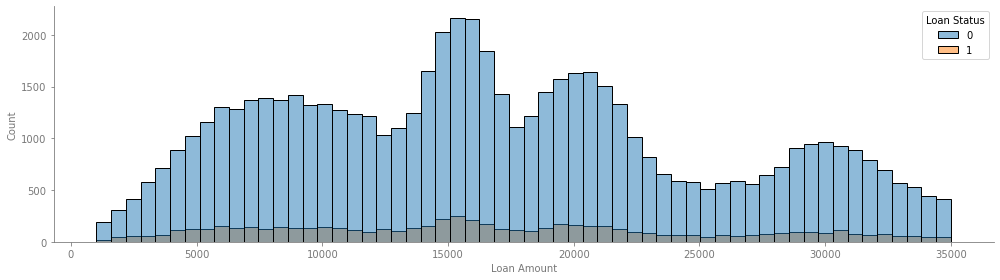

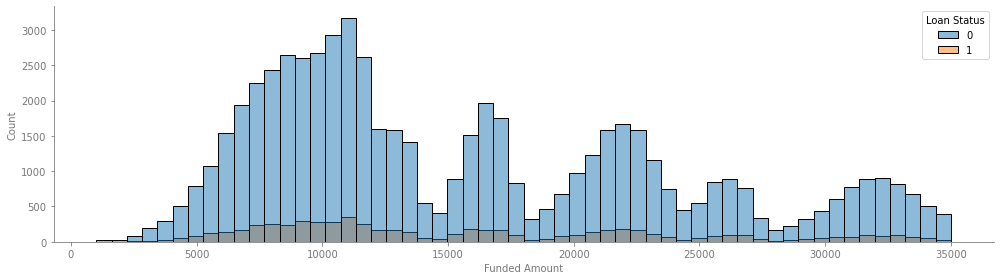

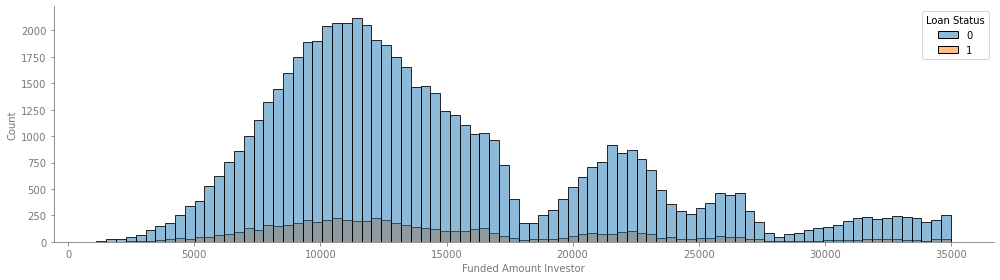

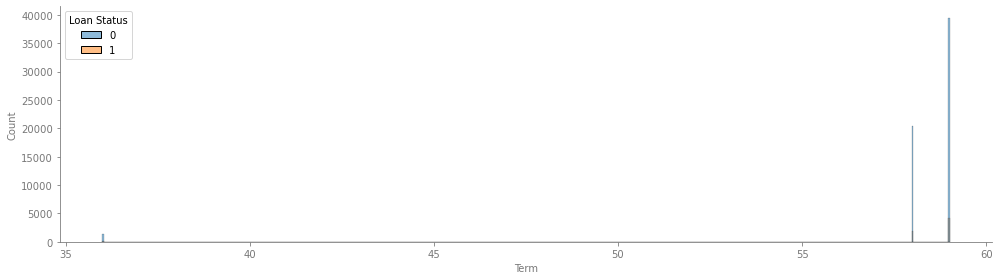

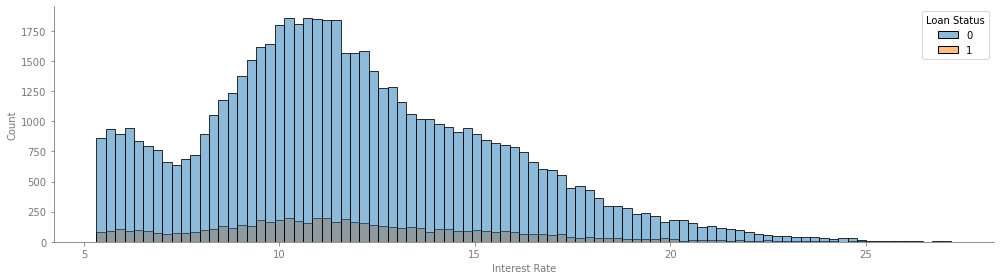

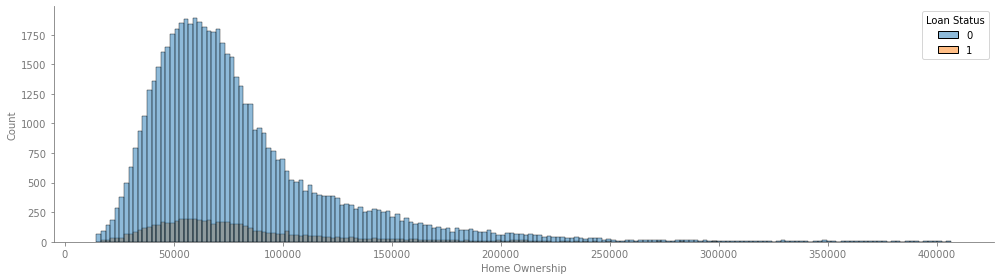

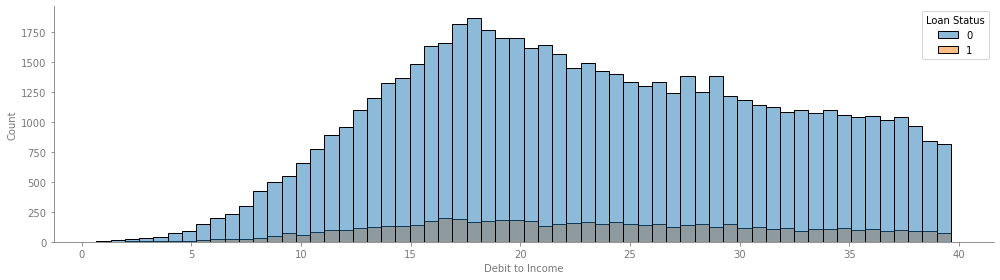

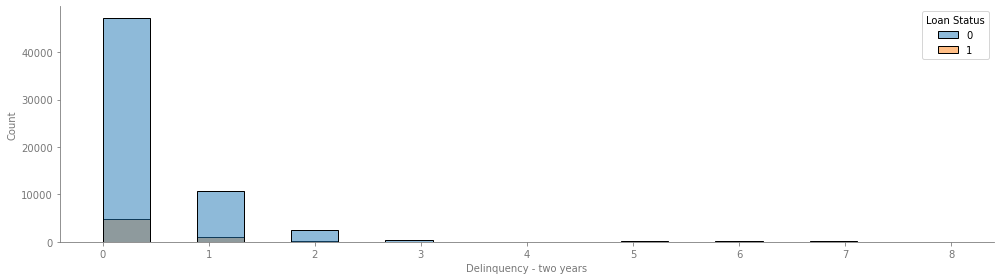

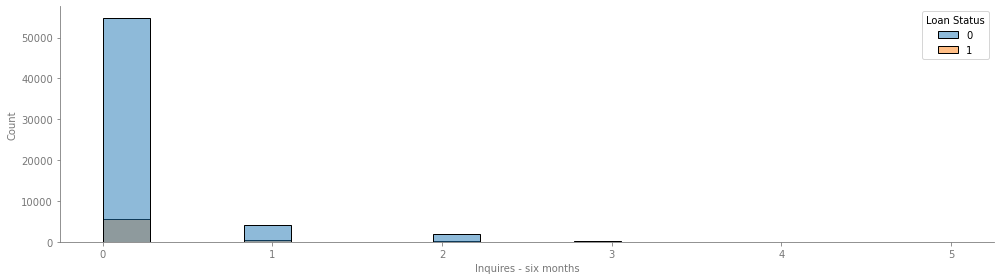

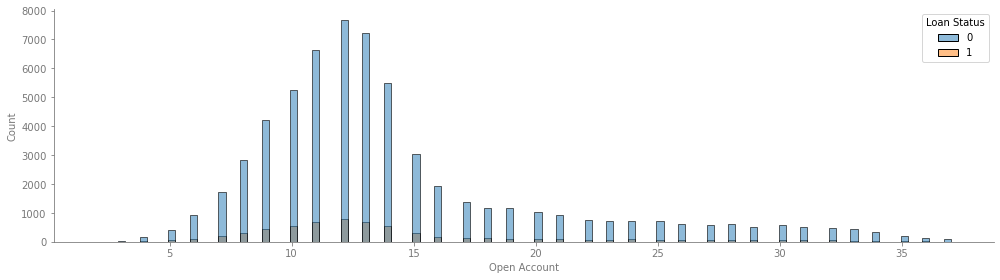

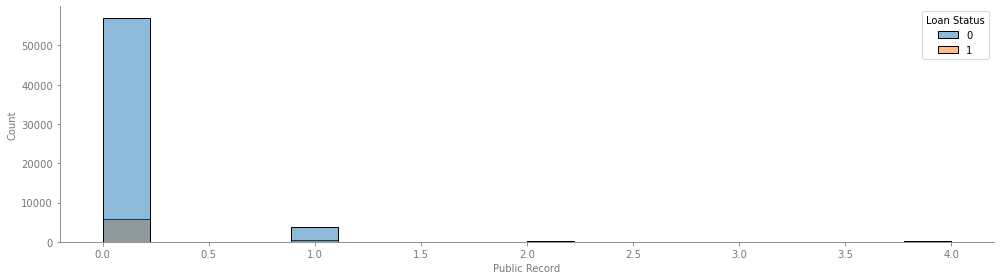

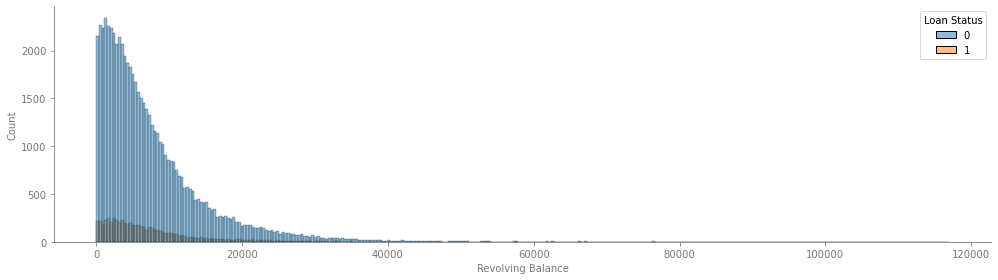

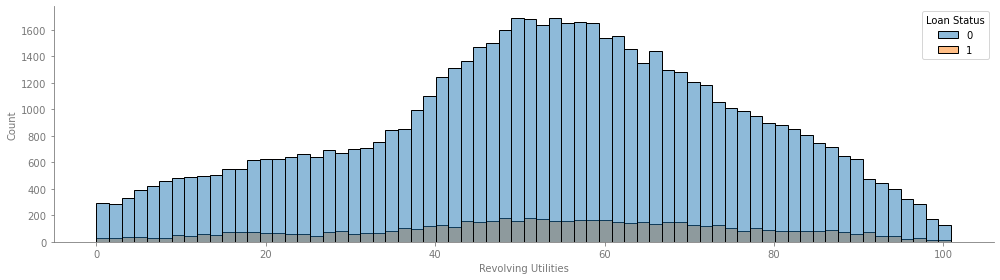

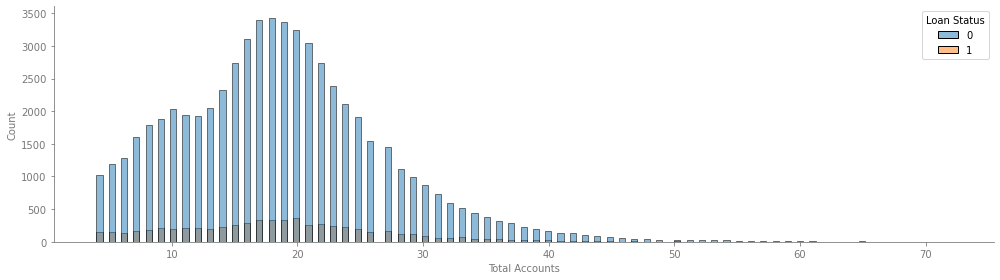

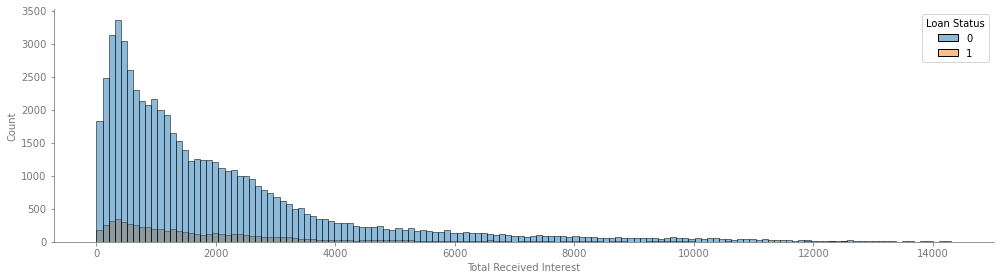

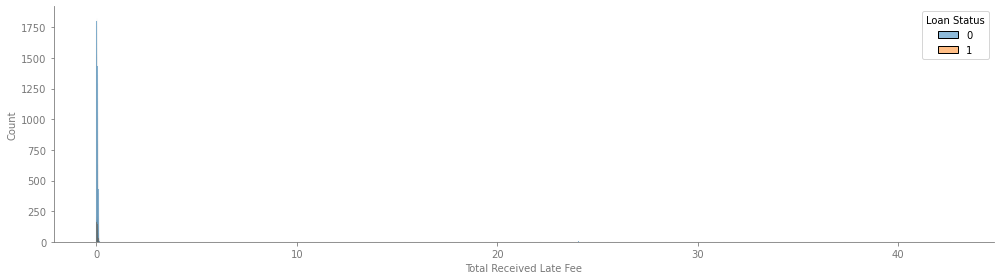

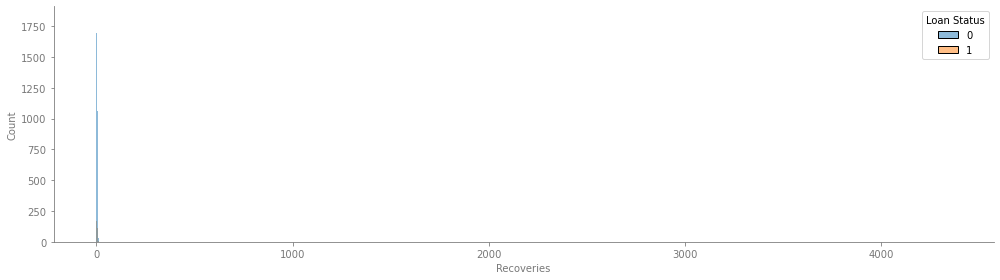

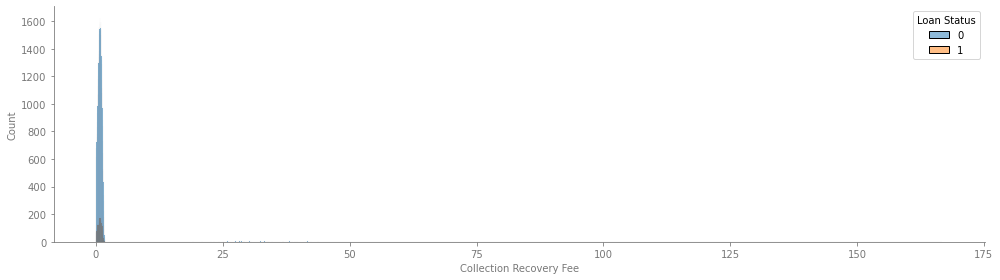

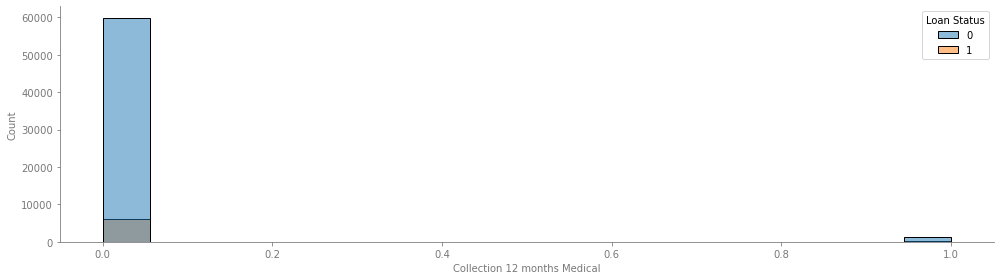

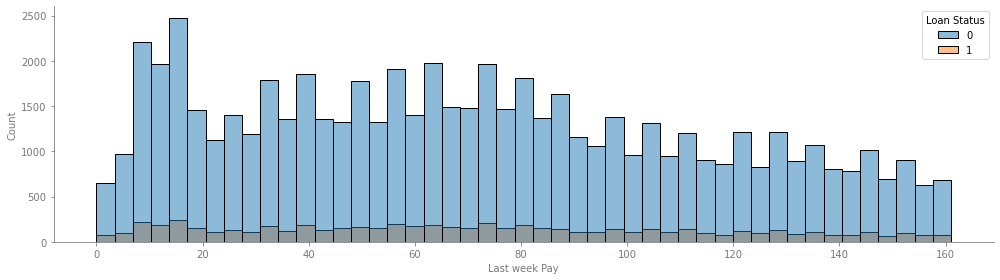

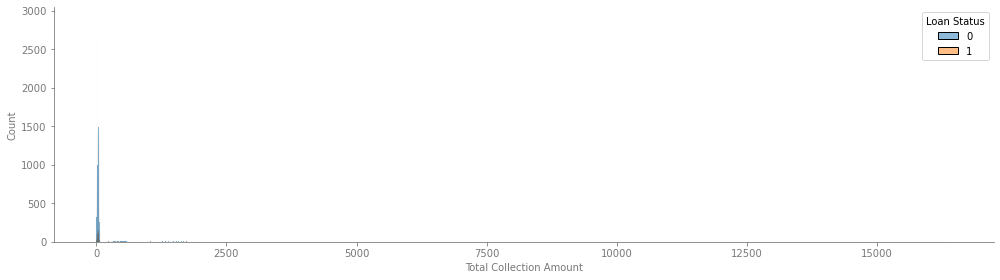

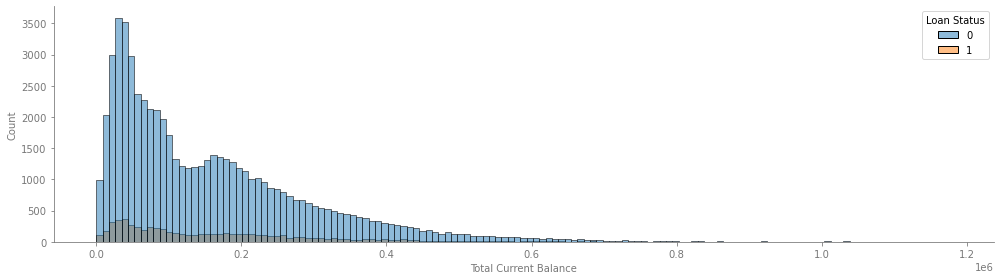

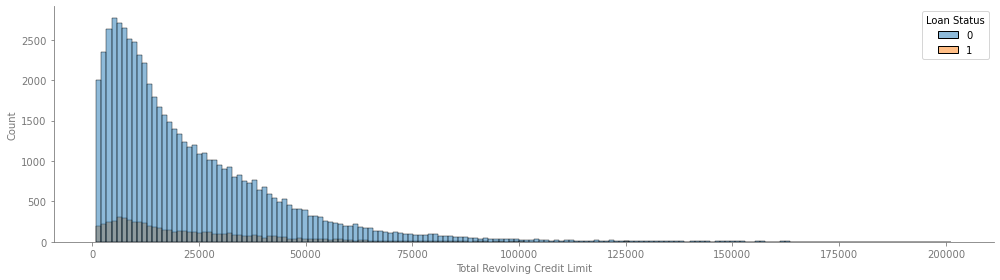

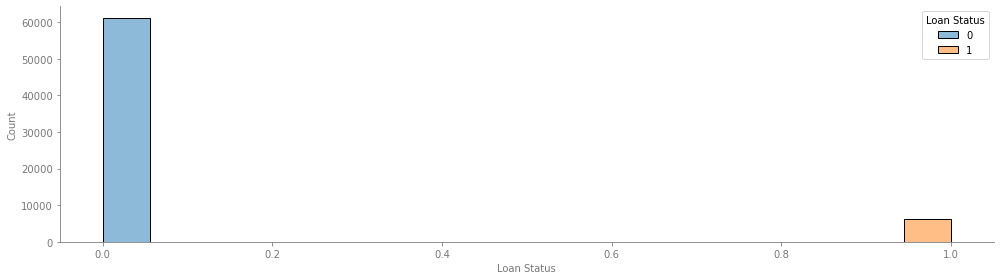

In [312]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

for feature in num_feature:
    with plt.rc_context(rc_params):

        #Instanciando a figure e axes
        fig, ax = plt.subplots( figsize = (14,4) )

        #Aplicando os parâmetros no matplotlib/seaborn
        with plt.rc_context(rc_params):

          #Criando um histograma para a variável tenure
          sns.histplot(data = df, x = feature, ax = ax, hue = "Loan Status")


        #Exibindo o gráfico
        plt.tight_layout()

A partir dos histogramas, vemos que a varios outliers realmente não contribuem tanto para a informação a respeito do Loan Status. Serão retirados os outliers de 'Home Ownership', 'Interest Rate', 'Inquires - six months', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Total Collection Amount', 'Total Revolving Credit Limit'

In [19]:
#armazenando as features para utilizar o método IQR Score
feature_IQR = ['Home Ownership', 'Interest Rate', 'Inquires - six months', 'Total Accounts',
               'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
               'Collection Recovery Fee', 'Collection 12 months Medical', 
               'Total Collection Amount', 'Total Revolving Credit Limit']

#Loop em relação as features
for feature in feature_IQR:

  Q1 = df[feature].quantile(q = 0.25) #Definindo o primeiro quartil
  Q3 = df[feature].quantile(q = 0.75) #Definindo o segundo quartil
  IQR = Q3 - Q1 #Definindo o interquartil
  Limite_Superior = Q3 + IQR #Definindo o Limite Superior
  Limite_Inferior = Q1 - IQR #Definindo o Limite Inferior

  #Eliminando os outliers acima do limite superior
  df.drop( df.loc[ df[feature] > Limite_Superior ].index, axis = 0, inplace = True )

  #Eliminando os outliers abaixo do limite inferior
  df.drop( df.loc[ df[feature] < Limite_Inferior ].index, axis = 0, inplace = True )

Apos retirar os outliers as variaveis 'Collection 12 months Medical' e 'Inquires - six months' passaram a ter somente um valor e serao excluidas

In [20]:
# #Removendo as colunas 'Payment Plan' e 'Accounts Delinquent'
df.drop(['Collection 12 months Medical', 'Inquires - six months'], axis = 1, inplace = True)

#Armazenando as features do dataframe
features_clean = df.columns.to_list()

#Replicando a função
var_df_clean = Map_Var_DF(features_clean,df)


# Balanceamento de dados

Este passo tem a finalidade de avarliarmos se os dados estão balanceados em relação a variável alvo (Loan Default)

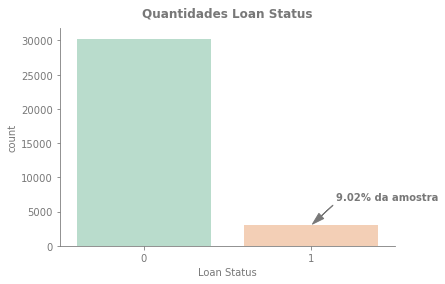

In [139]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'Loan Status', 
                data = df,
                ax = ax,
                palette = "Pastel2")
  
  #Exibindo o título
  ax.set_title("Quantidades Loan Status")

  #Armazena o % da amostra
  percentual_default = round((df['Loan Status'].value_counts()[1] / df.shape[0])*100,2)

  #Criar uma informação no gráfico
  ax.annotate(str(percentual_default) + "% da amostra", 
              xy = (1, df['Loan Status'].value_counts()[1]), 
              xytext = (25,25), 
              color = "#787878",
              weight = 'bold', 
              textcoords='offset points',
              arrowprops=dict(color = '#787878',  shrink= 0.05, width = 0.01, headwidth = 7))

  #Exibindo o gráfico
  plt.show()

Como mostrado no gráfico, os dados relacionados com a variável alvo Loan Status está desbalanceada, visto que apenas 9,02% dos dados totais estão relacionados com inadimplência.

# Preparacao dos dados 

Transformar as variaveis categoricas em numericas com o LabelEnconder e GetDummies e balanceamento da amostra

In [21]:
#Armazenando as features binarias
bin_feature = var_df_clean['feature'].loc[ (var_df_clean['Tipo'] == 'O') & (var_df_clean['Binário'] == 1) ].to_list()

#Armazenando as features categoricas
cat_feature = var_df_clean['feature'].loc[ (var_df_clean['Tipo'] == 'O') & (var_df_clean['Binário'] == 0) ].to_list()

#Armazenando as features numéricas
num_feature = var_df_clean['feature'].loc[ (var_df_clean['Tipo'] == 'float64') | (var_df_clean['Tipo'] == 'int64') ].to_list()
#Removendo a variavel alvo para treinamento dos modelos
num_feature.remove('Loan Status')

In [22]:
#Vamos copiar o dataframe
df = df.dropna()
# df_test = df_test.dropna()
df_trat = df.copy()


#Instanciando o objeto labelEncoder
le = LabelEncoder()

#Criando um loop para codificar as variáveis binárias
for feature in bin_feature:

  #transformando os valores binários em numéricos
  df_trat[feature] = le.fit_transform(df_trat[feature])

#Aplicando o get_dummies nas variáveis categóricas
df_trat = pd.get_dummies(data = df_trat, columns = cat_feature)

df_trat

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Batch Enrolled_BAT1104812,Batch Enrolled_BAT1135695,Batch Enrolled_BAT1184694,Batch Enrolled_BAT1467036,Batch Enrolled_BAT1586599,Batch Enrolled_BAT1761981,Batch Enrolled_BAT1766061,Batch Enrolled_BAT1780517,Batch Enrolled_BAT1930365,Batch Enrolled_BAT2003848,Batch Enrolled_BAT2078974,Batch Enrolled_BAT2136391,Batch Enrolled_BAT224923,Batch Enrolled_BAT2252229,Batch Enrolled_BAT2333412,Batch Enrolled_BAT2428731,Batch Enrolled_BAT2522922,Batch Enrolled_BAT2558388,Batch Enrolled_BAT2575549,Batch Enrolled_BAT2803411,Batch Enrolled_BAT2833642,Batch Enrolled_BAT3193689,Batch Enrolled_BAT3461431,Batch Enrolled_BAT3726927,Batch Enrolled_BAT3865626,Batch Enrolled_BAT3873588,Batch Enrolled_BAT4136152,Batch Enrolled_BAT4271519,Batch Enrolled_BAT4351734,Batch Enrolled_BAT4694572,Batch Enrolled_BAT4722912,Batch Enrolled_BAT4808022,Batch Enrolled_BAT5341619,Batch Enrolled_BAT5489674,Batch Enrolled_BAT5525466,Batch Enrolled_BAT5547201,Batch Enrolled_BAT5629144,Batch Enrolled_BAT5714674,Batch Enrolled_BAT5811547,Batch Enrolled_BAT5849876,Batch Enrolled_BAT5924421,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Sub Grade_A1,Sub Grade_A2,Sub Grade_A3,Sub Grade_A4,Sub Grade_A5,Sub Grade_B1,Sub Grade_B2,Sub Grade_B3,Sub Grade_B4,Sub Grade_B5,Sub Grade_C1,Sub Grade_C2,Sub Grade_C3,Sub Grade_C4,Sub Grade_C5,Sub Grade_D1,Sub Grade_D2,Sub Grade_D3,Sub Grade_D4,Sub Grade_D5,Sub Grade_E1,Sub Grade_E2,Sub Grade_E3,Sub Grade_E4,Sub Grade_E5,Sub Grade_F1,Sub Grade_F2,Sub Grade_F3,Sub Grade_F4,Sub Grade_F5,Sub Grade_G1,Sub Grade_G2,Sub Grade_G3,Sub Grade_G4,Sub Grade_G5,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Title_Bathroom,Loan Title_Bill Consolidation,Loan Title_Bill Payoff,Loan Title_Business,Loan Title_CC,Loan Title_CC Consolidation,Loan Title_CC Loan,Loan Title_CC Refi,Loan Title_CC Refinance,Loan Title_CC consolidation,Loan Title_CC-Refinance,Loan Title_CONSOLIDATE,Loan Title_CONSOLIDATION,Loan Title_Car Loan,Loan Title_Car financing,Loan Title_Card Consolidation,Loan Title_Cards,Loan Title_Consolidate,Loan Title_Consolidated,Loan Title_Consolidation,Loan Title_Consolidation Loan,Loan Title_Credit,Loan Title_Credit Card,Loan Title_Credit Card Consolidation,Loan Title_Credit Card Debt,Loan Title_Credit Card Loan,Loan Title_Credit Card Paydown,Loan Title_Credit Card Payoff,Loan Title_Credit Card Refi,Loan Title_Credit Card Refinance,Loan Title_Credit Card Refinance Loan,Loan Title_Credit Card consolidation,Loan Title_Credit Cards,Loan Title_Credit Consolidation,Loan Title_Credit Loan,Loan Title_Credit card pay off,Loan Title_Credit card payoff,Loan Title_Credit card refinance,Loan Title_Credit card refinancing,Loan Title_Credit payoff,Loan Title_DEBT CONSOLIDATION,Loan Title_Debt,Loan Title_Debt Consolidation,Loan Title_Debt Consolidation 2013,Loan Title_Debt Consolidation Loan,Loan Title_Debt Free,Loan Title_Debt Loan,Loan Title_Debt Payoff,Loan Title_Debt Reduction,Loan Title_Debt consolidation,Loan Title_Debt payoff,Loan Title_Dept consolidation,Loan Title_Freedom,Loan Title_Get Debt Free,Loan Title_Getting Ahead,Loan Title_Green loan,Loan Title_Home,Loan Title_Home Improvement,Loan Title_Home Improvement Loan,Loan Title_Home buying,Loan Title_Home improvement,Loan Title_Home loan,Loan Title_House,Loan Title_Lending Club,Loan Title_Lending loan,Loan Title_Loan,Loan Title_Loan 1,Loan Title_Loan Consolidation,Loan Title_MYLOAN,Loan Title_Major purchase,Loan Title_Medical,Loan Title_Medic

Agora iremos balancear os dados de treino para evitar que a predição fique enviesada. Para isso, utilizaremos a técnica de under-sampling, que retira aleatoriamente do conjunto de dados entradas da classe majoritária.

In [23]:
#Definindo os valores de X e y
X_train = df_trat.drop(['Loan Status'], axis = 1)
y_train = df_trat['Loan Status'].copy()


In [24]:
#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler()

# #Balanceando a amostra
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# #Transformando o array X em dataframe e y em série
X_train_rus = pd.DataFrame(X_train_rus, columns = X_train.columns)
y_train_rus = pd.Series(y_train_rus)

#Armazenando as features do dataframe
dfc = pd.concat([X_train_rus, y_train_rus], axis = 1)

#Armazenando as features do dataframe
feat = dfc.columns.to_list()

#Replicando a função
var_dfc = Map_Var_DF(feat,dfc)
y_train_rus.value_counts()

0    3001
1    3001
Name: Loan Status, dtype: int64

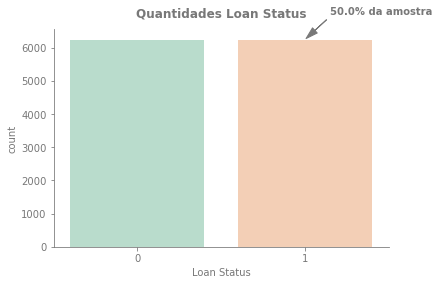

In [27]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'Loan Status', 
                data = dfc,
                ax = ax,
                palette = "Pastel2")
  
  #Exibindo o título
  ax.set_title("Quantidades Loan Status")

  #Armazena o % da amostra
  percentual_default = round((dfc['Loan Status'].value_counts()[1] / dfc.shape[0])*100,2)

  #Criar uma informação no gráfico
  ax.annotate(str(percentual_default) + "% da amostra", 
              xy = (1, dfc['Loan Status'].value_counts()[1]), 
              xytext = (25,25), 
              color = "#787878",
              weight = 'bold', 
              textcoords='offset points',
              arrowprops=dict(color = '#787878',  shrink= 0.05, width = 0.01, headwidth = 7))

  #Exibindo o gráfico
  plt.show()

In [25]:
#Instanciando os parâmetros do Kfold para Validação Cruzada
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [32]:
#Escalonando as variáveis numéricas
num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), num_feature)],
                         remainder='passthrough')

In [33]:
#Importando os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB


#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy = []

#Instanaciando os modelos com os hiperparâmetros otimizados
model_rl = LogisticRegression(random_state = 42, max_iter=1000)

model_rf = RandomForestClassifier(random_state = 42)

model_svc = SVC(random_state = 42, probability = True)

model_knn = KNeighborsClassifier()

model_xgb = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='logloss')

model_lgbm = LGBMClassifier(random_state = 42)

model_gnb = GaussianNB()

#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_rl, model_rf, model_svc, model_knn, model_xgb, model_lgbm, model_gnb]:
# for model in [model_lgbm]:

  #Criando um pipeline com a padronização + modelo
  pipe = make_pipeline(num_scaled, model)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus,
                          y = y_train_rus,
                          scoring = 'neg_log_loss',
                          cv = k_fold)
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy.append(-score.mean())

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = accuracy, 
                        index = name_model, 
                        columns = ['Log Loss'])

#Imprmindo a tabela de resultado
df_model

,Log Loss
LogisticRegression,0.705282
RandomForestClassifier,0.696375
SVC,0.694099
KNeighborsClassifier,1.952128
XGBClassifier,0.791722
LGBMClassifier,0.721383


O modelo que apresentou melhor classificaçao logloss foi SVC. Entretanto o valor de 0.694 para logloss num modelo de classificacao binaria com os dados de treino balanceados é um péssimo resultado. Chutar o valor da variavel alvo com probabilidades 50/50 resulta em logloss de aproximadamente 0.693. Ou seja, os modelos estão com problema de overfitting ou underfitting

In [65]:
#Definindo os passos da pipeline
pipe = make_pipeline(num_scaled, SVC(random_state = 42, probability = True))

#Definindo os parâmetros para simulação do GridSearch
param_grid = {"svc__C": [0.8, 1 , 3 ,5],
              "svc__gamma": ['scale', 'auto'],
              "svc__degree": [1,2,3,4]              
             }

#Instanciando o GridSearch
clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'neg_log_loss',
                   n_jobs = -1,
                   cv = k_fold)

#Ajustando com base no X_train e y_train balanceado
clf.fit(X = X_train_rus, 
        y = y_train_rus)

#Imprimindo o melhor parâmetro
clf.best_params_

{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'auto'}

In [66]:
#Imprimindo o score dos melhores hiperparâmetros
clf.best_score_

-0.6915950878367146

Mesmo procurando melhores parametros com o GridSearchCV o melhor score logloss foio 0.691, que ainda é um resultado ruim.

In [108]:
from sklearn.metrics import log_loss, roc_auc_score
# model_svc = SVC(random_state = 42, C = 1, degree = 2).fit(X_train_rus, y_train_rus)
model_xgb = XGBClassifier(random_state = 42, use_label_encoder = False,
                          eval_metric='logloss').fit(X_train_rus, y_train_rus)

# score1 = model_svc.score(X_train_rus, y_train_rus)
score2 = model_xgb.score(X_train, y_train)
pred_prob = model_xgb.predict_proba(X_train)
pred = model_xgb.predict(X_train)

print(score2)

print(log_loss(y_train, pred_prob))
print(roc_auc_score(y_train, pred_prob[:,1]))


0.5906016054839001
0.6962064321759551
0.8995163872452298


In [113]:
#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy = []

#Instanaciando os modelos com os hiperparâmetros otimizados
model_rl = LogisticRegression(random_state = 42, max_iter=1000)

model_rf = RandomForestClassifier(random_state = 42)

model_svc = SVC(random_state = 42)

model_knn = KNeighborsClassifier()

model_xgb = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='logloss')

model_lgbm = LGBMClassifier(random_state = 42)

#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_rl, model_rf, model_svc, model_knn, model_xgb, model_lgbm]:
# for model in [model_lgbm]:

  #Criando um pipeline com a padronização + modelo
  pipe = make_pipeline(model)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus,
                          y = y_train_rus,
                          scoring = 'roc_auc',
                          cv = k_fold)
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy.append(score.mean())

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = accuracy, 
                        index = name_model, 
                        columns = ['ROC_AUC'])

#Imprmindo a tabela de resultado
df_model

,ROC_AUC
LogisticRegression,0.506643
RandomForestClassifier,0.516721
SVC,0.510006
KNeighborsClassifier,0.505542
XGBClassifier,0.504629
LGBMClassifier,0.514666


Avaliando a metrica ROC_AUC, verifica-se o mesmo problema. Os modelos estao chutando com probabilidade 50/50 a classificacao


In [30]:
#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy_train = []
accuracy_test = []

#Dividindo o dataset em treino e test
X_train_rus2, X_test_rus2, y_train_rus2, y_test_rus2 = train_test_split(X_train_rus, 
                                                    y_train_rus, 
                                                    shuffle = True, 
                                                    stratify = y_train_rus,
                                                    random_state = 42)

#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_rl, model_rf, model_svc, model_knn, model_xgb, model_lgbm]:
# for model in [model_lgbm]:

  model.fit(X_train_rus2, y_train_rus2)
  score_train = model.score(X_train_rus2,y_train_rus2 )  
  
  score_test = model.score(X_test_rus2,y_test_rus2 )  
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy_train.append(score_train.mean())
  #Armazenando o score do modelo
  accuracy_test.append(score_test.mean())
    

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = list(zip(accuracy_train, accuracy_test)), 
                        index = name_model, 
                        columns = ['Score train', 'Score test'])

#Imprmindo a tabela de resultado
df_model

[0.5221061986225283]
[0.5143237841439041]
[0.5221061986225283, 1.0]
[0.5143237841439041, 0.4936708860759494]
[0.5221061986225283, 1.0, 0.5169962230615419]
[0.5143237841439041, 0.4936708860759494, 0.5189873417721519]
[0.5221061986225283, 1.0, 0.5169962230615419, 0.6918462563874694]
[0.5143237841439041, 0.4936708860759494, 0.5189873417721519, 0.5063291139240507]
[0.5221061986225283, 1.0, 0.5169962230615419, 0.6918462563874694, 0.9960008886914019]
[0.5143237841439041, 0.4936708860759494, 0.5189873417721519, 0.5063291139240507, 0.5009993337774816]
[0.5221061986225283, 1.0, 0.5169962230615419, 0.6918462563874694, 0.9960008886914019, 0.9797822706065319]
[0.5143237841439041, 0.4936708860759494, 0.5189873417721519, 0.5063291139240507, 0.5009993337774816, 0.5263157894736842]


,Score train,Score test
LogisticRegression,0.522106,0.514324
RandomForestClassifier,1.000000,0.493671
SVC,0.516996,0.518987
KNeighborsClassifier,0.691846,0.506329
XGBClassifier,0.996001,0.500999
LGBMClassifier,0.979782,0.526316


A partir da tabela acima podemos ver que alguns modelos estao com problema de overfitting enquanto que outros modelos estao com problema de underfitting